 # What is the average birth weight of babies in the United States?

## About dataset:

National Survey of Family Growth (NSFG)

* Nationally representative of women 15-44 years of age in the United States.
* Information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and general and reproductive health.

In [13]:
### Reading dataset
import numpy as np
import pandas as pd 
nsfg = pd.read_hdf('./Files/nsfg.hdf5', 'nsfg')

In [3]:
nsfg.head() 

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [8]:
# Columns and rows

nsfg.shape 

(9358, 10)

In [5]:
nsfg.columns 

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

## Analysis's Questions.

### How much did (BABY'S NAME/this 1st baby) weigh at birth? (Pounds)

In [6]:
# Selecting columns 
pounds = nsfg['birthwgt_lb1'] 
ounces = nsfg['birthwgt_oz1']

In [9]:
pounds.value_counts().sort_index() 

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [11]:
# Describe

pounds.describe() 

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [14]:
# Replace

pounds = pounds.replace([98, 99], np.nan) 
pounds.mean() 

6.703286384976526

In [15]:
ounces.replace([98, 99], np.nan, inplace=True) 

In [16]:
# Arithmetic with Series

birth_weight = pounds + ounces / 16.0 
birth_weight.describe() 

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

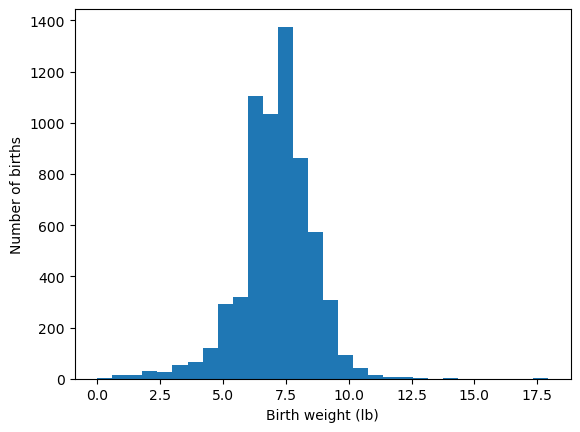

In [19]:
# Filter and Visualize

# Histogram

import matplotlib.pyplot as plt 

plt.hist(birth_weight.dropna(), bins=30)

plt.xlabel('Birth weight (lb)') 
plt.ylabel('Number of births') 
plt.show() 

In [28]:

birth_weight = birth_weight.dropna()
bins = pd.cut(birth_weight, 30)
grouped = birth_weight.groupby(bins)


counts = grouped.count()

filtered_counts = counts[counts > 1000]

print(filtered_counts)

(5.979, 6.577]    1104
(6.577, 7.175]    1033
(7.175, 7.773]    1375
dtype: int64


So, What do we can see in the previous graph?

* Birth weights falling between 5.979 and 6.577 have a count of 1104.
* Birth weights in the range of 6.577 to 7.175 are represented by 1033 occurrences.
* The highest count, 1375, is observed for birth weights within the range of 7.175 to 7.773.

![Captura de pantalla 2024-01-01 191147.png](<attachment:Captura de pantalla 2024-01-01 191147.png>)
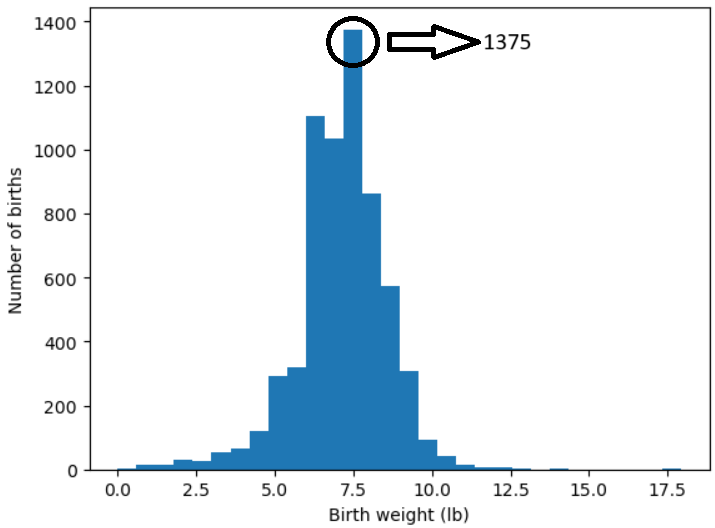